In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSVファイルのパス
csv_file_path = "./log/iphone-3.csv"

# CSVファイルを読み込む
data = pd.read_csv(csv_file_path)

# 時間、X軸、Y軸、Z軸のデータを取得
start_time = data['time'][0]
relative_time = data['time'] - start_time - 0.75
x = data['x'].values
y = data['y'].values
z = data['z'].values

# グラフの範囲
fig_range = (0, 1.1)

# サンプリング周波数
sampling_rate = 100

# 積分する関数
def integral(x):
    dx = np.array([])
    sum = 0
    for i in range(len(x)):
        sum += x[i]
        dx = np.append(dx, sum)
    return dx / sampling_rate


Duplicate key in file PosixPath('/usr/local/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family : sans-serif')


/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_48549/1129852477.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)
/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_48549/1129852477.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)


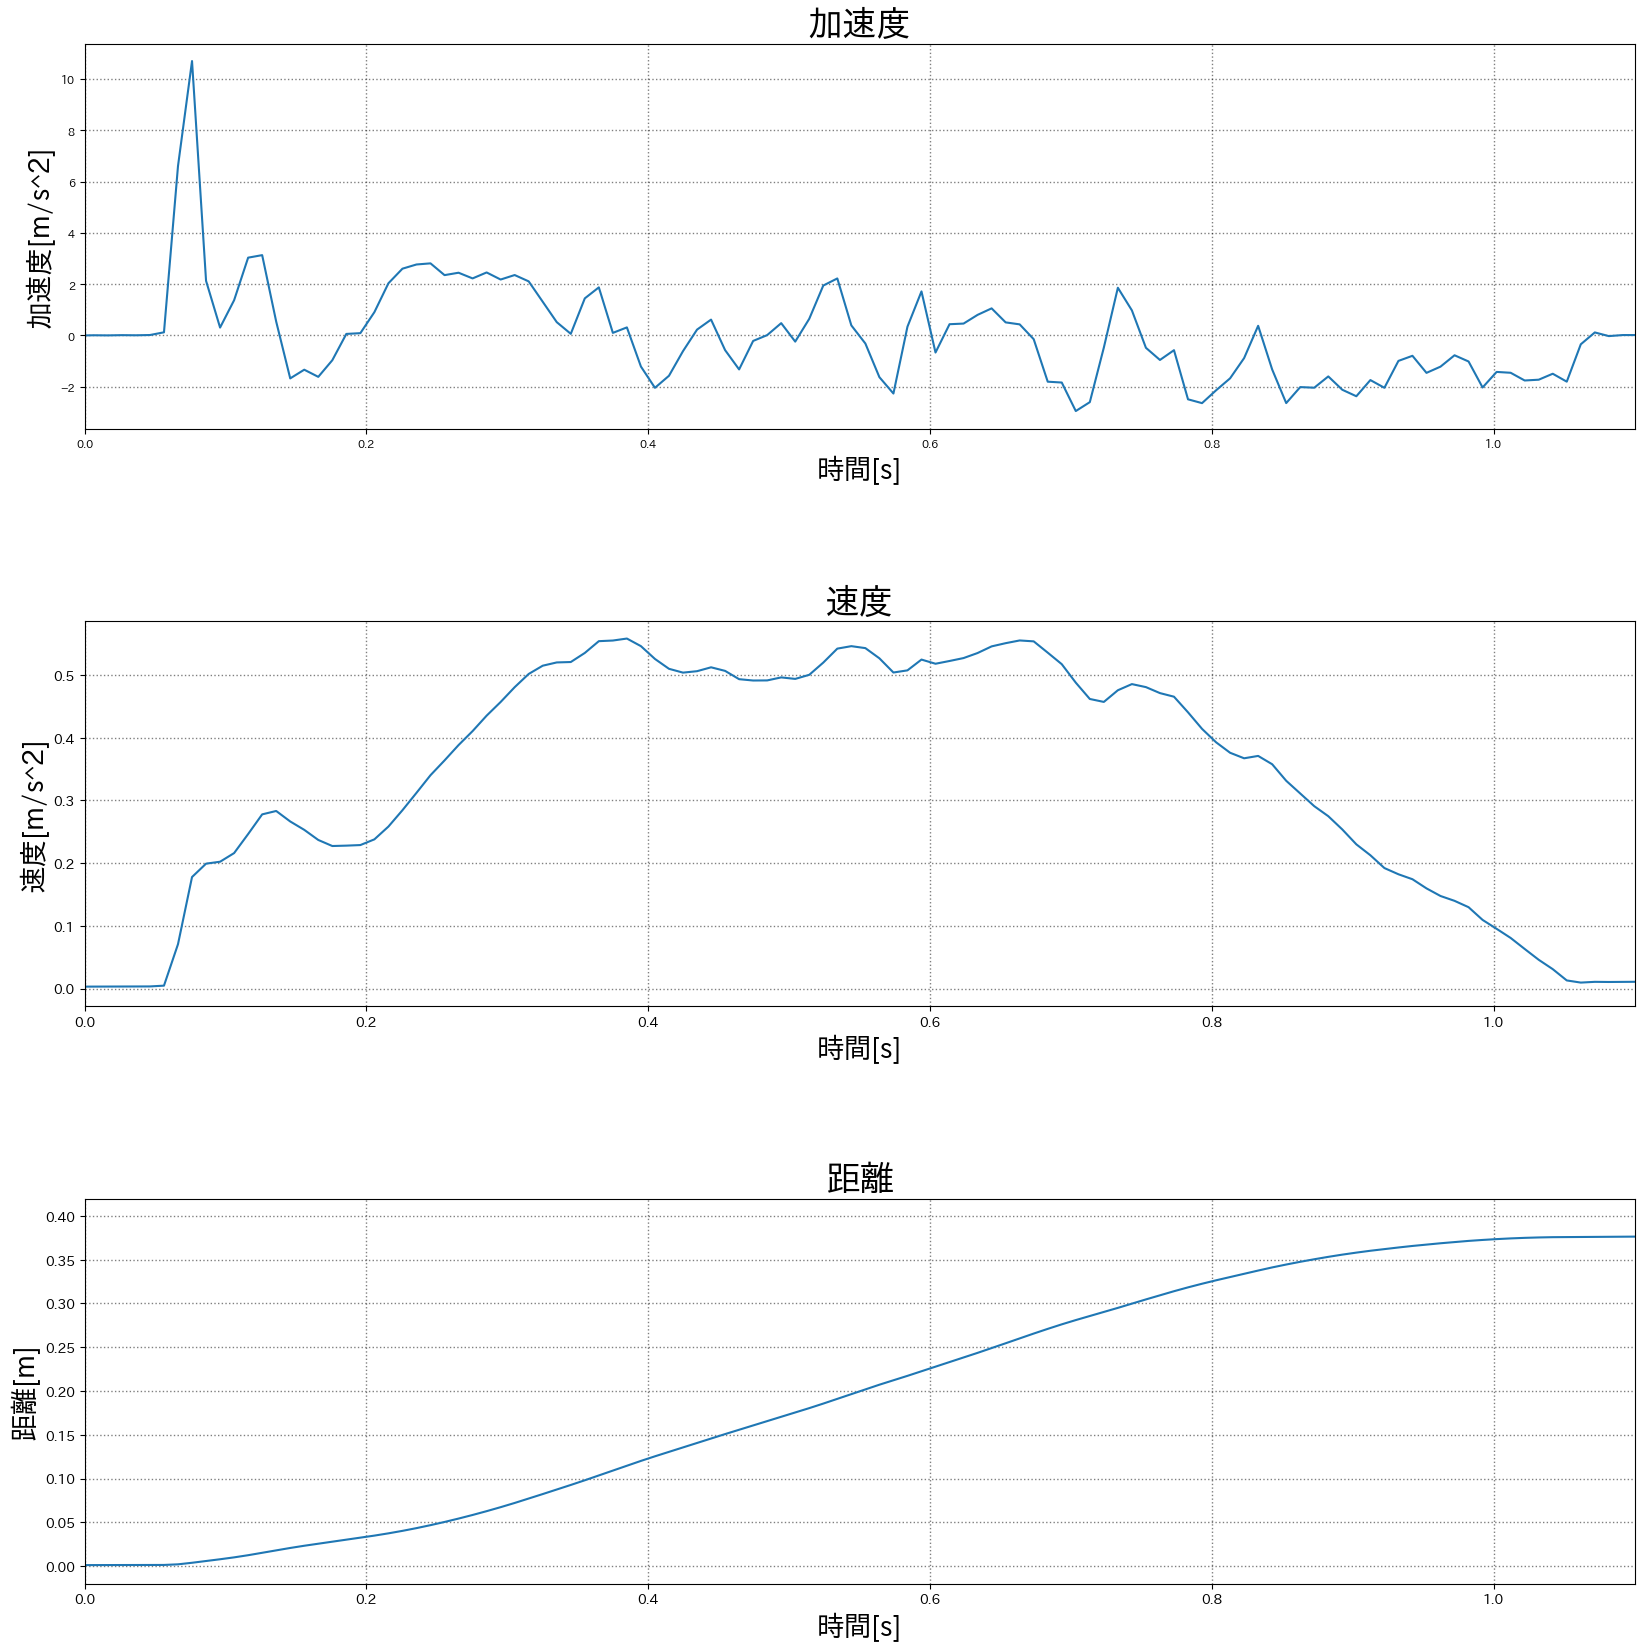

In [3]:
# 積分したデータを格納するリスト
dx = integral(x)
d2x = integral(dx)

# グラフの描画
fontsize_title = 25
fontsize_label = 20

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax1.set_ylabel('加速度[m/s^2]', fontdict={'size': fontsize_label})

ax2 = fig.add_subplot(3, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('速度', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax2.set_ylabel('速度[m/s^2]', fontdict={'size': fontsize_label})

ax3 = fig.add_subplot(3, 1, 3)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('距離', fontdict={'size': fontsize_title})
ax3.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax3.set_ylabel('距離[m]', fontdict={'size': fontsize_label})

# データをプロット
ax1.plot(relative_time, x, label='ax1')
ax2.plot(relative_time, dx, label='vx')
ax3.plot(relative_time, d2x, label='px')

# 範囲を指定
ax1.set_xlim(*fig_range)
ax2.set_xlim(*fig_range)
ax3.set_xlim(*fig_range)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)

# グラフを表示
plt.show()
